# Prediction of leaderboard score (R)

In [1]:
score_data = read.csv('../input/scores.csv',stringsAsFactors=FALSE)
score_data[with(score_data, order(leaderboard_score)), ]

,model,leaderboard_score,accuracy,logloss,AUC,f1,mu,std
18,bagged_nolearn,0.4313,0.7813,7.5554,0.5857,0.3152,NA,NA
19,LogisticRegression,0.4411,0.7708,7.9152,0.554,0.2235,0.7601,0.0013
15,voting_ensemble_soft,0.4415,0.7847,7.4355,0.6103,0.38,0.7599,0.0015
21,bagged_logit,0.4442,0.783,7.4954,0.5794,0.2938,0.76,0.0015
3,GradientBoostingClassifier,0.4452,0.7934,7.1356,0.6309,0.4251,0.7538,0.0047
20,LogisticRegressionCV,0.4457,0.783,7.4954,0.5794,0.2938,0.7602,0.0012
24,bagged_scikit_nn,0.4465,0.7986,6.9558,0.674,0.5085,0.7463,0.0065
16,bagged_gbc,0.4527,0.7899,7.2556,0.6137,0.3858,0.7573,0.0037
1,nolearn,0.4566,0.8056,6.7159,0.6711,0.5044,NA,NA
4,ExtraTreesClassifier,0.4729,0.776,7.7353,0.5996,0.3582,0.7526,0.0061


# Model using all variables

In [2]:
lm.fit = lm(leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std, 
            data      = score_data, 
            na.action = na.omit)

slm.fit = step(lm.fit, direction = "both")
summary(slm.fit)

Start:  AIC=-59.59
leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- AUC       1  0.026010 0.25010 -59.725
<none>                  0.22409 -59.591
- accuracy  1  0.039026 0.26312 -58.862
- logloss   1  0.039109 0.26320 -58.857
- f1        1  0.055789 0.27988 -57.812
- mu        1  0.083558 0.30765 -56.204
- std       1  0.210779 0.43487 -50.321

Step:  AIC=-59.72
leaderboard_score ~ accuracy + logloss + f1 + mu + std

           Df Sum of Sq     RSS     AIC
<none>                  0.25010 -59.725
+ AUC       1  0.026010 0.22409 -59.591
- accuracy  1  0.036370 0.28647 -59.417
- logloss   1  0.036672 0.28677 -59.399
- mu        1  0.059771 0.30987 -58.082
- f1        1  0.061368 0.31147 -57.994
- std       1  0.184786 0.43489 -52.320



Call:
lm(formula = leaderboard_score ~ accuracy + logloss + f1 + mu + 
    std, data = score_data, na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19483 -0.07857 -0.01207  0.03450  0.36601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -2707.589   2152.885  -1.258   0.2346  
accuracy     2716.710   2148.005   1.265   0.2321  
logloss        79.103     62.286   1.270   0.2303  
f1              1.702      1.036   1.643   0.1287  
mu            -16.433     10.135  -1.621   0.1332  
std           -39.776     13.952  -2.851   0.0158 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1508 on 11 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.8742,	Adjusted R-squared:  0.8171 
F-statistic: 15.29 on 5 and 11 DF,  p-value: 0.0001241


# Plot Predicted Scores vs Actual Leaderboard Scores

In [7]:
predictions = c()
models = c()
scores = c()
for (i in 1:nrow(score_data)) {
    if (is.na(score_data[i,'std'])) {next}
    if (score_data[i,'model']=='RandomForestClassifier     ') {next} # a far outlier
    if (score_data[i,'model']=='KNeighborsClassifier       ') {next} # a far outlier
    
#     print(paste0("|",score_data[i,'model'],"|"))
    
    
    models = c(models, score_data[i,'model'])
    scores = c(scores, score_data[i,'leaderboard_score'])
    
    accuracy = score_data[i,'accuracy']
    logloss  = score_data[i,'logloss']
    AUC      = score_data[i,'AUC']
    f1       = score_data[i,'f1']
    mu       = score_data[i,'mu']
    std      = score_data[i,'std']
    predictions = c(predictions, round(predict(object=slm.fit,
                                 newdata  = data.frame(accuracy,logloss,AUC,f1,mu,std)),4))
}
pred_v_act = data.frame(models,scores,predictions)
pred_v_act

[1] "|LogisticRegression         |"
[1] "|voting_ensemble_soft       |"
[1] "|bagged_logit               |"
[1] "|GradientBoostingClassifier |"
[1] "|LogisticRegressionCV       |"
[1] "|bagged_scikit_nn           |"
[1] "|bagged_gbc                 |"
[1] "|ExtraTreesClassifier       |"
[1] "|XGBClassifier              |"
[1] "|BaggingClassifier          |"
[1] "|scikit_nn                  |"
[1] "|SVC                        |"
[1] "|SGDClassifier              |"
[1] "|boosted_logit              |"
[1] "|AdaBoostClassifier         |"
[1] "|voting_ensemble_hard       |"
[1] "|boosted_svc                |"


,models,scores,predictions
1,LogisticRegression,0.4411,0.4066
2,voting_ensemble_soft,0.4415,0.4847
3,bagged_logit,0.4442,0.4563
4,GradientBoostingClassifier,0.4452,0.4468
5,LogisticRegressionCV,0.4457,0.4649
6,bagged_scikit_nn,0.4465,0.5445
7,bagged_gbc,0.4527,0.3461
8,ExtraTreesClassifier,0.4729,0.4644
9,XGBClassifier,0.4851,0.6799
10,BaggingClassifier,0.4885,0.6259


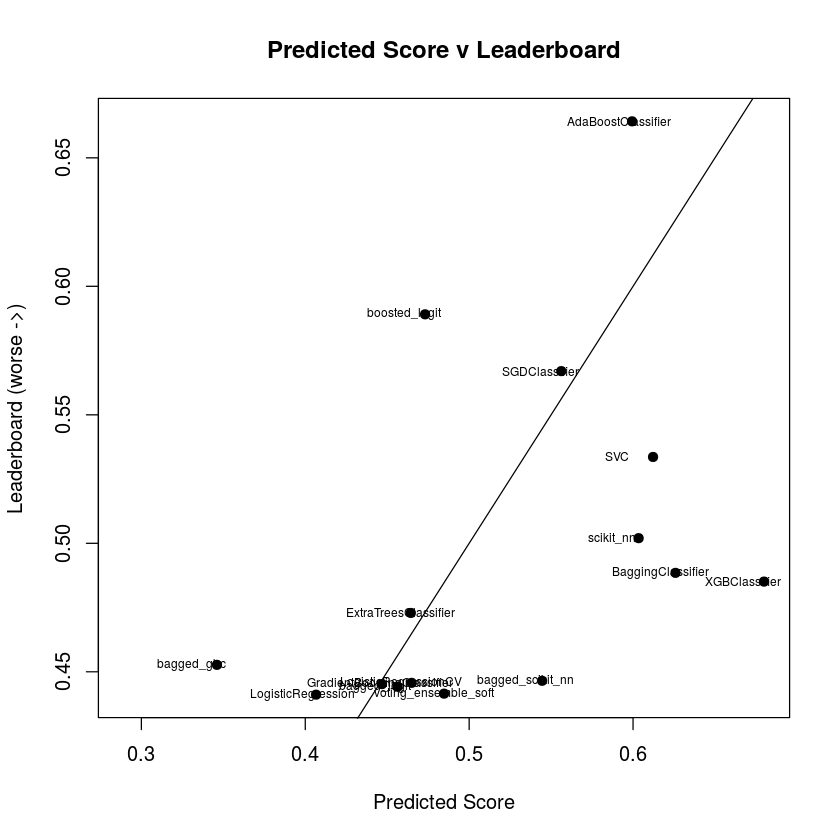

In [8]:
#par(pin=c(6,6))
library(car)
plot(pred_v_act[,'predictions'], pred_v_act[,'scores'], main="Predicted Score v Leaderboard", 
    ylab="Leaderboard (worse ->)", xlab="Predicted Score", pch=19)#, xlim=c(0.25,1.8),ylim=c(0.25,1.8))
text(pred_v_act[,'predictions'], pred_v_act[,'scores'], labels=models, cex= 0.6)
abline(coef=c(0,1))


In [5]:
score_data = score_data[with(score_data, order(leaderboard_score)), ]

library(knitr)
foo = kable(score_data, format = "markdown", digits = 4)
foof = ''
for (i in 1:length(foo)) {
    subs = substr(foo[i],5,52)
    foof = cat(foof,cat(subs,'\n'))
}
foof

|model                      | leaderboard_score| 
|:--------------------------|-----------------:| 
|bagged_nolearn             |            0.4313| 
|LogisticRegression         |            0.4411| 
|voting_ensemble_soft       |            0.4415| 
|bagged_logit               |            0.4442| 
|GradientBoostingClassifier |            0.4452| 
|LogisticRegressionCV       |            0.4457| 
|bagged_scikit_nn           |            0.4465| 
|bagged_gbc                 |            0.4527| 
|nolearn                    |            0.4566| 
|ExtraTreesClassifier       |            0.4729| 
|XGBClassifier              |            0.4851| 
|BaggingClassifier          |            0.4885| 
|ensemble of averages       |            0.4896| 
|scikit_nn                  |            0.5020| 
|SVC                        |            0.5336| 
|SGDClassifier              |            0.5670| 
|cosine_similarity          |            0.5732| 
|boosted_logit              |            0.5891| 


NULL